# Spacing

This notebook shows the different spacings that are currently implemented and how they can be used.
There are currently three different spacings that can be used, LinearSpacing, SinhSpacing and CubicSpacing.
They are defined in source/spacing.py.

In [1]:
# Spacing examples

# restart the kernel to clear past work
# (can also do this manually from the Kernel options above)
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [2]:
import sys
sys.path.append("./")

from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

from source.derivatives import Derivatives
from source.display import set_grid_on_ax
from source.spacing import *

In [3]:
num_points = 32
r_max = 8
x = np.arange(num_points, dtype=np.uint)

In [4]:
# Definition of the spacings.
# For sinh, there is one free parameter a which is taken equal to 1.

lin_sp = LinearSpacing(num_points, r_max)
sinh_sp = SinhSpacing(num_points, r_max)

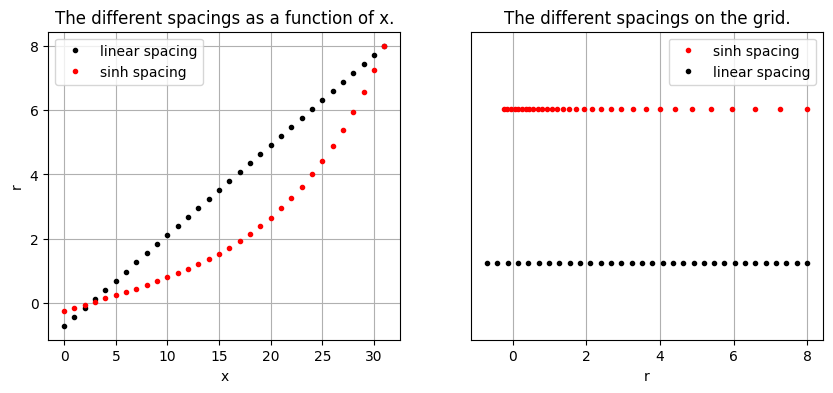

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(x, lin_sp[0], ".", color="black", label="linear spacing")
ax[0].plot(x, sinh_sp[0], ".", color="red", label="sinh spacing")

ax[0].set_xlabel("x")
ax[0].set_ylabel("r")
ax[0].legend()
ax[0].set_title("The different spacings as a function of x.")
ax[0].grid()

ax[1].plot(sinh_sp[0], 1 + np.zeros(num_points), ".", color="red", label="sinh spacing")
ax[1].plot(lin_sp[0], np.zeros(num_points), ".", color="black", label="linear spacing")

ax[1].set_ylim(-.5, 1.5)
ax[1].set_yticks([])
ax[1].set_xlabel("r")
ax[1].legend(loc="best")
ax[1].set_title("The different spacings on the grid.")
ax[1].grid()

In [6]:
# Varying number of points but fixed minimal dx

min_dr = 1 / 8
max_dr = 1

lin_params = LinearSpacing.get_parameters(r_max, min_dr)
sinh_params = SinhSpacing.get_parameters(r_max, min_dr, max_dr)
cubic_params = CubicSpacing.get_parameters(r_max, min_dr, max_dr)

print(f"Linear spacing: {lin_params}.")
print(f"Sinh spacing: {sinh_params}.")
print(f"Cubic spacing: {cubic_params}.")

Linear spacing: {'r_max': 8, 'extent': <SpacingExtent.HALF: 0>, 'num_points': 68}.
Sinh spacing: {'r_max': 8, 'extent': <SpacingExtent.HALF: 0>, 'a': 1.0079052613579393, 'num_points': 26}.
Cubic spacing: {'r_max': 8, 'extent': <SpacingExtent.HALF: 0>, 'a': 0.9071147352221454, 'num_points': 23}.


In [7]:
lin_sp = LinearSpacing(**lin_params)
sinh_sp = SinhSpacing(**sinh_params)
cubic_sp = CubicSpacing(**cubic_params)

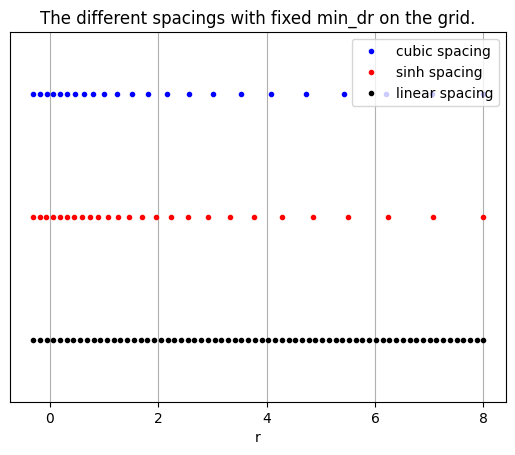

In [8]:
fig, ax = plt.subplots()

ax.plot(cubic_sp[0], 2 + np.zeros_like(cubic_sp[0]), ".", color="blue", label="cubic spacing")
ax.plot(sinh_sp[0], 1 + np.zeros_like(sinh_sp[0]), ".", color="red", label="sinh spacing")
ax.plot(lin_sp[0], np.zeros_like(lin_sp[0]), ".", color="black", label="linear spacing")

ax.set_ylim(-.5, 2.5)
ax.set_yticks([])
ax.set_xlabel("r")
ax.legend(loc="best")
ax.set_title("The different spacings with fixed min_dr on the grid.")
ax.grid()

In [9]:
sinh_sp1 = SinhSpacing(num_points, r_max, a=1)
sinh_sp2 = SinhSpacing(num_points, r_max, a=2)
sinh_sp5 = SinhSpacing(num_points, r_max, a=5)

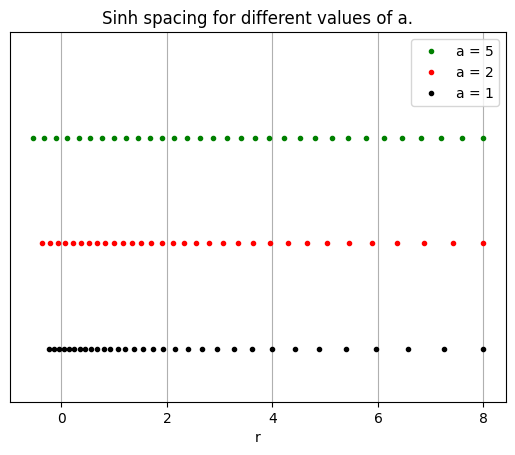

In [10]:
fig, ax = plt.subplots()

ax.plot(
    sinh_sp5[0], 
    np.zeros(num_points) + 2, 
    ".", color="green", label="a = 5"
)
ax.plot(
    sinh_sp2[0], 
    np.zeros(num_points) + 1, 
    ".", color="red", label="a = 2"
)
ax.plot(
    sinh_sp1[0], 
    np.zeros(num_points), 
    ".", color="black", label="a = 1"
)

ax.set_ylim(-.5, 3)
ax.set_yticks([])
ax.set_xlabel("r")
ax.legend(loc="best")
ax.set_title("Sinh spacing for different values of a.")
ax.grid()

## Derivatives

In this section, we are checking that the derivatives are computed correctly on sine function.

In [11]:
r_max = 16
min_dr, max_dr = 1 / 16, 1 / 8

# Get the parameters from the min_dr, max_dr we want.
params = CubicSpacing.get_parameters(r_max, min_dr, max_dr)
# params = SinhSpacing.get_parameters(r_max, min_dr, max_dr)
print(params)

{'r_max': 16, 'extent': <SpacingExtent.HALF: 0>, 'a': 12.0, 'num_points': 196}


In [12]:
sp = CubicSpacing(**params)
# sp = SinhSpacing(**params)
der = Derivatives(sp)

r_plot = np.linspace(-r_max, r_max, 1_024)

In [13]:
def f(z):
    return np.sin(z)

dnf_dxn = np.zeros((7, r_plot.size))
dnf_dxn[0] = np.sin(r_plot)
dnf_dxn[1] = np.cos(r_plot)
dnf_dxn[2] = -np.sin(r_plot)
dnf_dxn[3] = -np.cos(r_plot)
dnf_dxn[4] = np.sin(r_plot)
dnf_dxn[5] = np.cos(r_plot)
dnf_dxn[6] = -np.sin(r_plot)

In [14]:
r = sp[0]

dny_dxn = np.zeros((7, r.size))
dr = der.dnr_dxn[1] * der.dx

y = f(r)
dny_dxn[0] = der.drn_matrix[0] @ y / dr**0
dny_dxn[1] = der.drn_matrix[1] @ y / dr**1
dny_dxn[2] = der.drn_matrix[2] @ y / dr**2
dny_dxn[3] = der.drn_matrix[3] @ y / dr**3
dny_dxn[4] = der.drn_matrix[4] @ y / dr**4
dny_dxn[5] = der.drn_matrix[5] @ y / dr**5
dny_dxn[6] = der.drn_matrix[6] @ y / dr**6

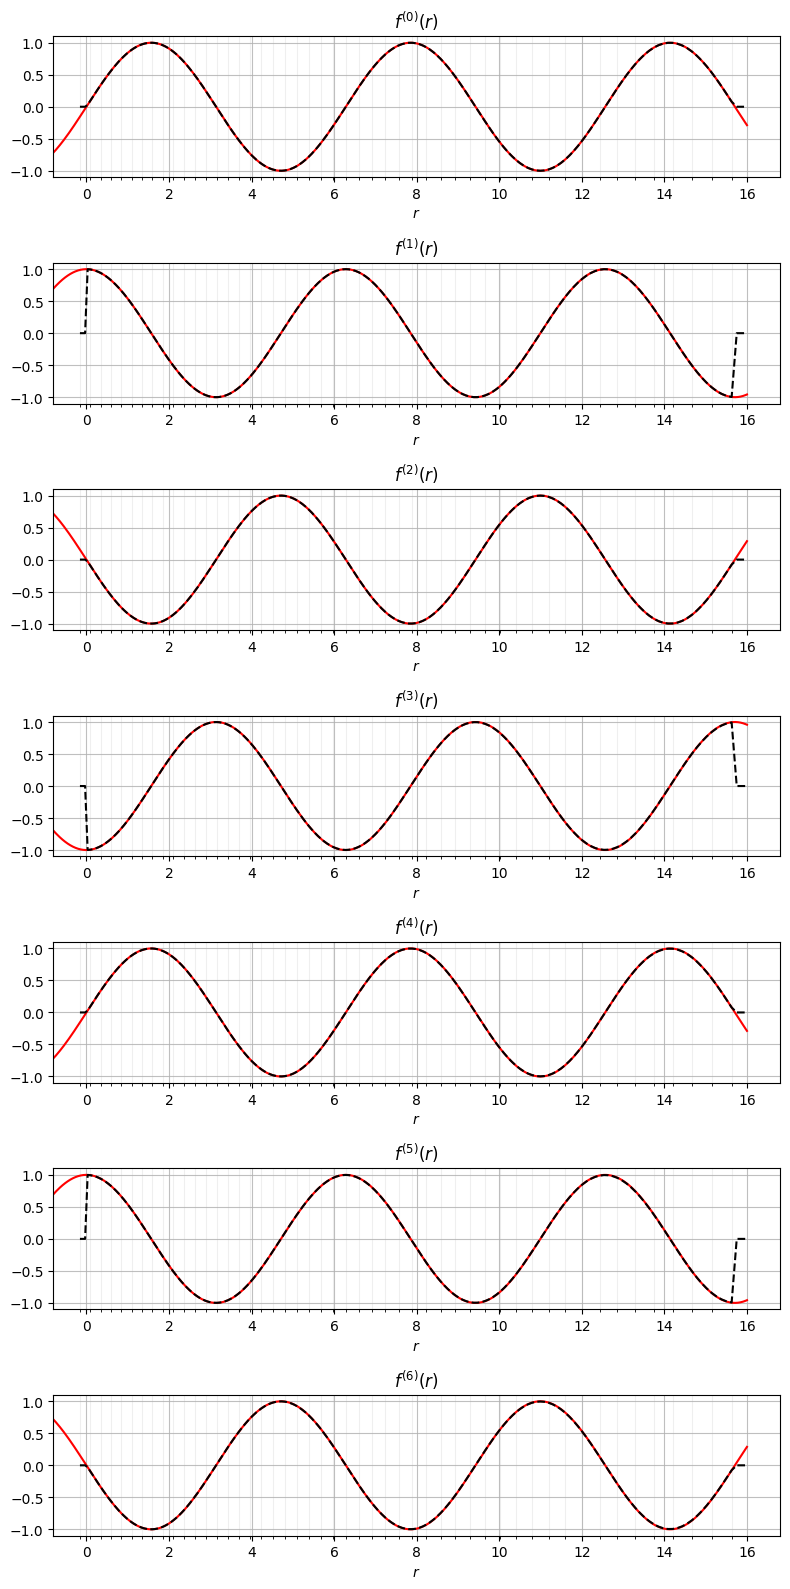

In [16]:
fig, ax = plt.subplots(7, 1, figsize=(8, 16))

for i in range(7):
    ax[i].plot(r_plot, dnf_dxn[i], "-", color="red")
    ax[i].plot(r, dny_dxn[i], "--", color="black")
    set_grid_on_ax(ax[i], r)
    ax[i].set_title(f"$f^{{({i})}}(r)$")

fig.tight_layout()